<a href="https://colab.research.google.com/github/YamanItech/AI/blob/main/AdultDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [378]:
from google.colab import files
uploaded = files.upload()


Saving adult.csv to adult.csv


# 1. Preliminary Data Analysis

## 1.1 Importing the libraries

In [379]:
#importing and pre-processing data
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

#visualizing data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#training data
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as ltb

#checking models accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## 1.2 Dataset

In [380]:
df=pd.read_csv("/content/adult.csv")
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [381]:
# Display the last few rows of the dataframe
df.tail(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32542,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
32543,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32544,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32546,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32547,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32549,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32550,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


1. We can observe that _**education-num**_ and _**education**_ are the same variables with different data types. We can drop any one of them.
2. We have _**categorical**_ and _**numerical variables**_.

We need to convert all variables to the _**same datatype**_ for classification.

## 1.3 Columns & thier Datatypes

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [383]:
print(df.shape)

(32561, 15)


In [384]:
# Print the data types of all columns
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object


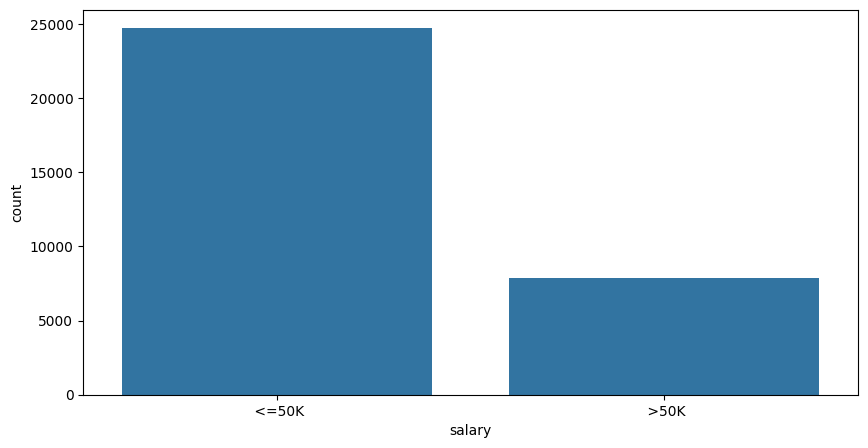

In [385]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.countplot(x = df['salary'])
plt.show()

## 1.3 Summary Statistics

In [386]:
# Display basic descriptive statistics for numerical features
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1. There's _**no missing data**_ as all counts are same.
2. There is _**presence of outliers**_ in the dataset in various columns.
3. There data has _**skewness**_ too.

In [387]:
df.describe(include='all')  # For both numerical and categorical columns

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [389]:
#unique from df.describe(include="all") doesn't count unique for numerical value, but it does
df.nunique()

,0
age,73
workclass,9
fnlwgt,21648
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2


In [390]:
# Replace '?' with NaN across the entire DataFrame  ( As it doesn't concider as NAN, and can't determine missing_value)
df = df.replace(' ?', np.nan)
# Check for missing values
missing_values = df.isnull().sum()
print("Count of NA/NaN values after loading:\n", missing_values)


Count of NA/NaN values after loading:
 age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64


In [392]:
df['workclass'] = df['workclass'].astype('object').fillna('Unknown')
df['occupation'] = df['occupation'].astype('object').fillna('Unknown')
df['country'] = df['country'].astype('object').fillna('Unknown')


#Data Selection and Filtering

In [393]:
#Data Selection and Filtering
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [394]:
df.iloc[0:5, 0:3]  # First 5 rows and first 3 columns

,age,workclass,fnlwgt
0,39,State-gov,77516
1,50,Self-emp-not-inc,83311
2,38,Private,215646
3,53,Private,234721
4,28,Private,338409


In [396]:
df.iloc[4:10, 3:6]  # First 5 rows and first 3 columns

,education,education-num,marital-status
4,Bachelors,13,Married-civ-spouse
5,Masters,14,Married-civ-spouse
6,9th,5,Married-spouse-absent
7,HS-grad,9,Married-civ-spouse
8,Masters,14,Never-married
9,Bachelors,13,Married-civ-spouse


In [397]:
df.loc[df['age'] > 70]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
74,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K
100,76,Private,124191,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
157,71,Self-emp-not-inc,494223,Some-college,10,Separated,Sales,Unmarried,Black,Male,0,1816,2,United-States,<=50K
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
228,75,Private,314209,Assoc-voc,11,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,20,Columbia,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32494,82,Unknown,403910,HS-grad,9,Never-married,Unknown,Not-in-family,White,Male,0,0,3,United-States,<=50K
32501,71,Private,138145,9th,5,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
32525,81,Unknown,120478,Assoc-voc,11,Divorced,Unknown,Unmarried,White,Female,0,0,1,Unknown,<=50K
32539,71,Unknown,287372,Doctorate,16,Married-civ-spouse,Unknown,Husband,White,Male,0,0,10,United-States,>50K


In [398]:
df['salary'] = df['salary'].str.strip()
df.query('age > 20 & salary == ">50K"')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,Unknown,287372,Doctorate,16,Married-civ-spouse,Unknown,Husband,White,Male,0,0,10,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


#Feature Engineering


In [399]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [400]:
# Check unique values (for inspection)
for col in df.columns:
    uniques = df[col].unique()
    print(f"{col} has {len(uniques)} unique values: {uniques}")

# Clean up whitespace from all string columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


age has 73 unique values: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass has 9 unique values: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 'Unknown' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt has 21648 unique values: [ 77516  83311 215646 ...  34066  84661 257302]
education has 16 unique values: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num has 16 unique values: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status has 7 unique values: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation has 15 unique values: [' Adm-cl

<ipython-input-400-ef756e380b0e>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [401]:
df['workclass'] = df['workclass'].replace({
    'Private': 0,
    'Local-gov': 1,
    'Self-emp-not-inc': 2,
    'Federal-gov': 3,
    'State-gov': 4,
    'Self-emp-inc': 5,
    'Without-pay': 6,
    'Never-worked': 7,
    'Unknown': 8
})


<ipython-input-401-48d50a925a89>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['workclass'] = df['workclass'].replace({


In [402]:
df['education'] = df['education'].replace({
    '11th': 0,
    'HS-grad': 1,
    'Assoc-acdm': 2,
    'Some-college': 3,
    '10th': 4,
    'Prof-school': 5,
    '7th-8th': 6,
    'Bachelors': 7,
    'Masters': 8,
    '5th-6th': 9,
    'Assoc-voc': 10,
    '9th': 11,
    'Doctorate': 12,
    '12th': 13,
    '1st-4th': 14,
    'Preschool': 15
})


<ipython-input-402-72e3fc9c4055>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education'] = df['education'].replace({


In [403]:
df['marital-status'] = df['marital-status'].replace({
    'Never-married': 0,
    'Married-civ-spouse': 1,
    'Widowed': 2,
    'Divorced': 3,
    'Separated': 4,
    'Married-spouse-absent': 5,
    'Married-AF-spouse': 6
})


<ipython-input-403-b06bd6404003>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['marital-status'] = df['marital-status'].replace({


In [404]:
df['relationship'] = df['relationship'].replace({
    'Own-child': 0,
    'Husband': 1,
    'Not-in-family': 2,
    'Unmarried': 3,
    'Wife': 4,
    'Other-relative': 5
})


<ipython-input-404-4fa3e809daf5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['relationship'] = df['relationship'].replace({


In [405]:
race_mapping = {'Black': 0, 'White': 1, 'Other': 2, 'Amer-Indian-Eskimo': 3, 'Asian-Pac-Islander': 4}
df['race'] = df['race'].replace(race_mapping)

<ipython-input-405-d25ad7d73d4b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['race'] = df['race'].replace(race_mapping)


In [406]:
occupation_mapping = {
    'Machine-op-inspct': 0,
    'Farming-fishing': 1,
    'Protective-serv': 2,
    'Other-service': 3,
    'Prof-specialty': 4,
    'Craft-repair': 5,
    'Adm-clerical': 6,
    'Exec-managerial': 7,
    'Tech-support': 8,
    'Sales': 9,
    'Priv-house-serv': 10,
    'Transport-moving': 11,
    'Handlers-cleaners': 12,
    'Armed-Forces': 13,
     'Unknown': 14
}

df['occupation'] = df['occupation'].replace(occupation_mapping)


<ipython-input-406-c1f88a5199a3>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['occupation'] = df['occupation'].replace(occupation_mapping)


In [407]:
gender_mapping = {'Male': 0, 'Female': 1}
df['sex'] = df['sex'].replace(gender_mapping)

<ipython-input-407-16d7b8d64448>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace(gender_mapping)


In [408]:
# Encoding for 'native-country'
country_mapping = {'United-States': 0, 'Peru': 1, 'Guatemala': 2, 'Mexico': 3, 'Dominican-Republic': 4,
                          'Ireland': 5, 'Germany': 6, 'Philippines': 7, 'Thailand': 8, 'Haiti': 9, 'El-Salvador': 10,
                          'Puerto-Rico': 11, 'Vietnam': 12, 'South': 13, 'Columbia': 14, 'Japan': 15, 'India': 16,
                          'Cambodia': 17, 'Poland': 18, 'Laos': 19, 'England': 20, 'Cuba': 21, 'Taiwan': 22,
                          'Italy': 23, 'Canada': 24, 'Portugal': 25, 'China': 26, 'Nicaragua': 27, 'Honduras': 28,
                          'Iran': 29, 'Scotland': 30, 'Jamaica': 31, 'Ecuador': 32, 'Yugoslavia': 33, 'Hungary': 34,
                          'Hong': 35, 'Greece': 36, 'Trinadad&Tobago': 37, 'Outlying-US(Guam-USVI-etc)': 38,
                          'France': 39, 'Holand-Netherlands': 40,
                           'Unknown': 41}
df['country'] = df['country'].replace(country_mapping)

<ipython-input-408-4fb2650119f3>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['country'] = df['country'].replace(country_mapping)


In [409]:
# Encoding for 'income'
salary_mapping = {'<=50K': 0, '>50K': 1}
df['salary'] = df['salary'].replace(salary_mapping)

# Now, each of these columns is encoded with integer values starting from zero


<ipython-input-409-78fdee3d03c5>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['salary'] = df['salary'].replace(salary_mapping)


In [410]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,4,77516,7,13,0,6,2,1,0,2174,0,40,0,0
1,50,2,83311,7,13,1,7,1,1,0,0,0,13,0,0
2,38,0,215646,1,9,3,12,2,1,0,0,0,40,0,0
3,53,0,234721,0,7,1,12,1,0,0,0,0,40,0,0
4,28,0,338409,7,13,1,4,4,0,1,0,0,40,21,0
5,37,0,284582,8,14,1,7,4,1,1,0,0,40,0,0
6,49,0,160187,11,5,5,3,2,0,1,0,0,16,31,0
7,52,2,209642,1,9,1,7,1,1,0,0,0,45,0,1
8,31,0,45781,8,14,0,4,2,1,1,14084,0,50,0,1
9,42,0,159449,7,13,1,7,1,1,0,5178,0,40,0,1


## Normalization / Standardization

In [369]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Fit and transform the data
data_normalized_array = scaler.fit_transform(df[numerical_cols])

# Convert the normalized array back into a DataFrame
data_normalized = pd.DataFrame(data_normalized_array, columns=numerical_cols, index=df.index)

# Now 'data_normalized' is a DataFrame with normalized data

##Outlier Treatment

In [370]:
def outlier_detector(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    return lower_bound,upper_bound
# This takes a column of the dataframe (a series),
# checks for the percentile we want to check it for and then calculates and the upper and lower bounds

In [375]:
lowerbound, upperbound = outlier_detector(data_normalized['age'])
lowerbound, upperbound

(np.float64(-0.3295454545454546), np.float64(1.2159090909090908))

# 2.Exploratory Data Analysis

In [411]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

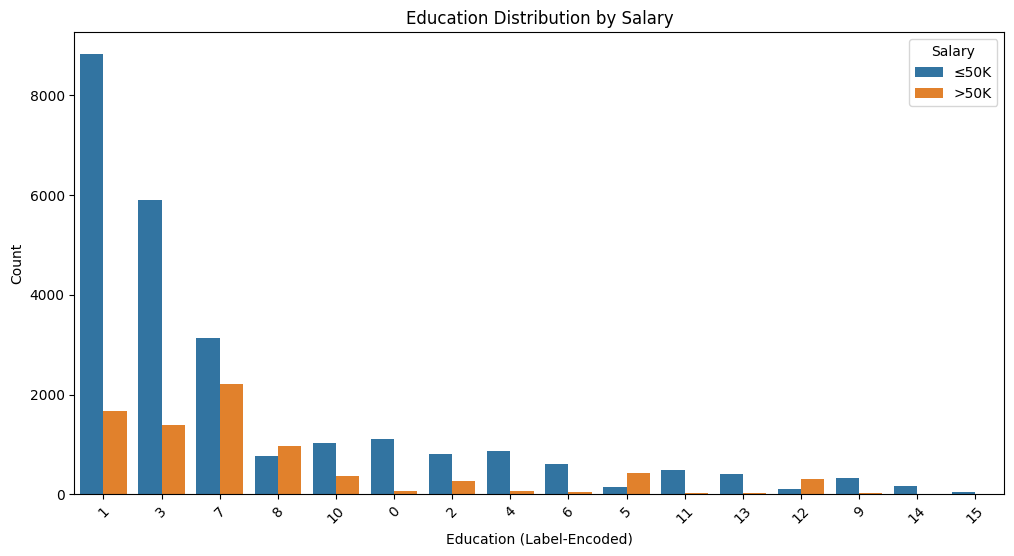

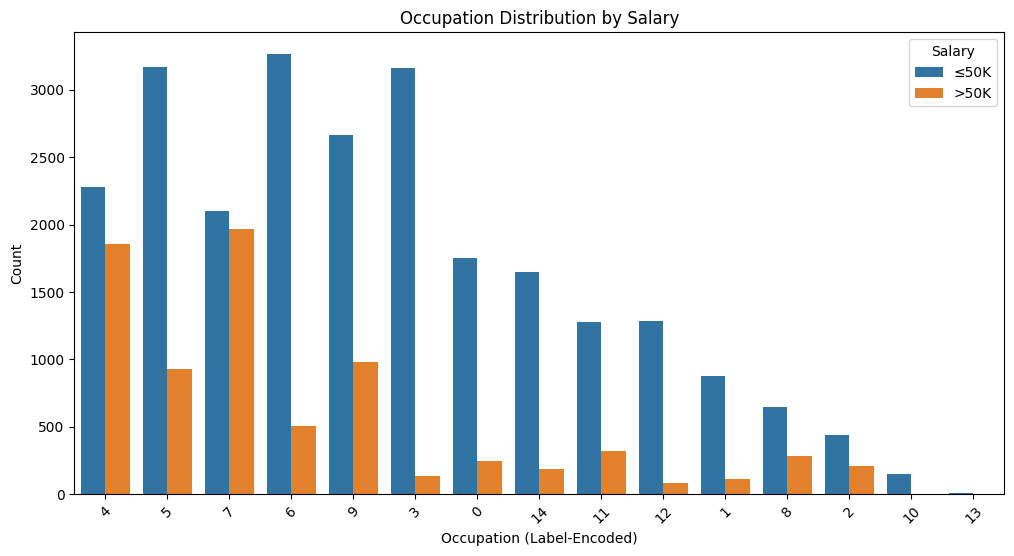

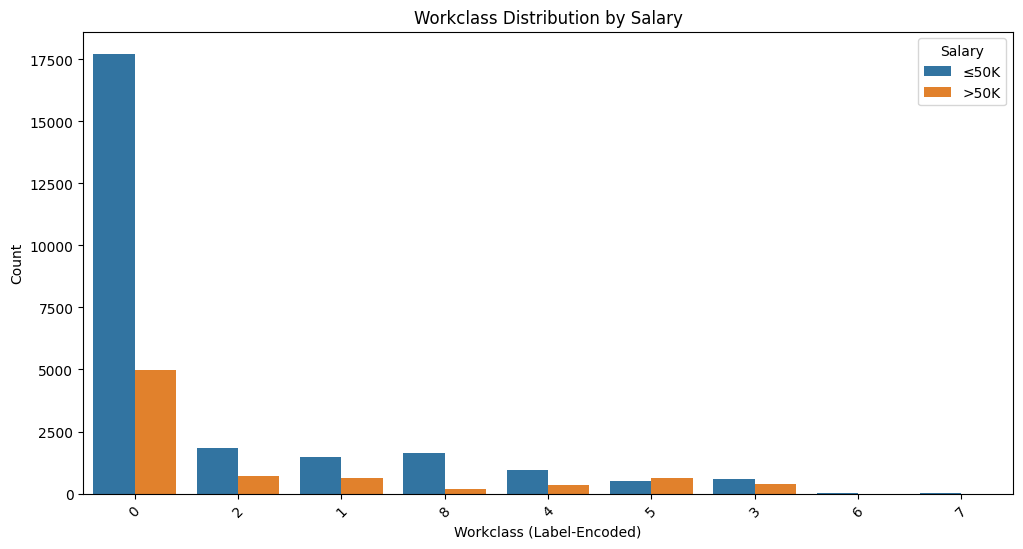

In [412]:
# 1. Bar Plots for Categorical Features
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='salary', order=df['education'].value_counts().index)
plt.title('Education Distribution by Salary')
plt.xlabel('Education (Label-Encoded)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Salary', labels=['≤50K', '>50K'])
plt.show()
print(" \n ")

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='occupation', hue='salary', order=df['occupation'].value_counts().index)
plt.title('Occupation Distribution by Salary')
plt.xlabel('Occupation (Label-Encoded)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Salary', labels=['≤50K', '>50K'])
plt.show()
print(" \n ")

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='workclass', hue='salary', order=df['workclass'].value_counts().index)
plt.title('Workclass Distribution by Salary')
plt.xlabel('Workclass (Label-Encoded)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Salary', labels=['≤50K', '>50K'])
plt.show()
print(" \n ")




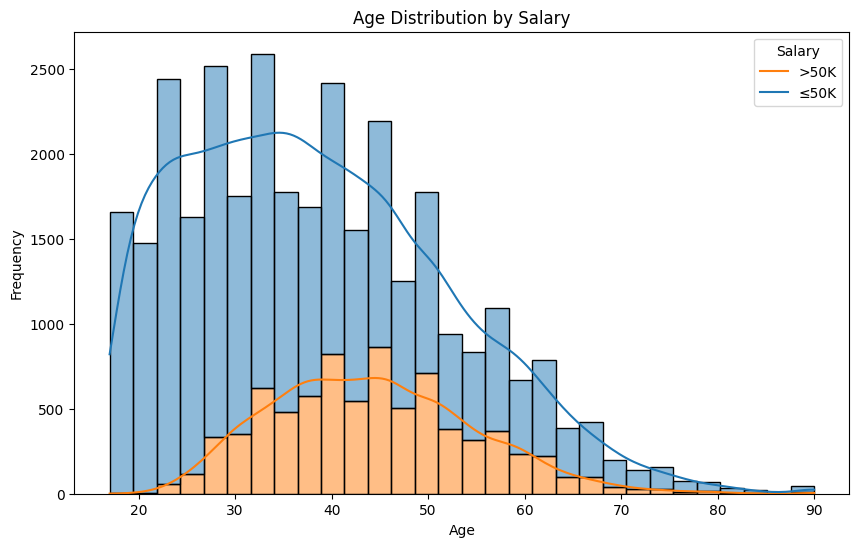

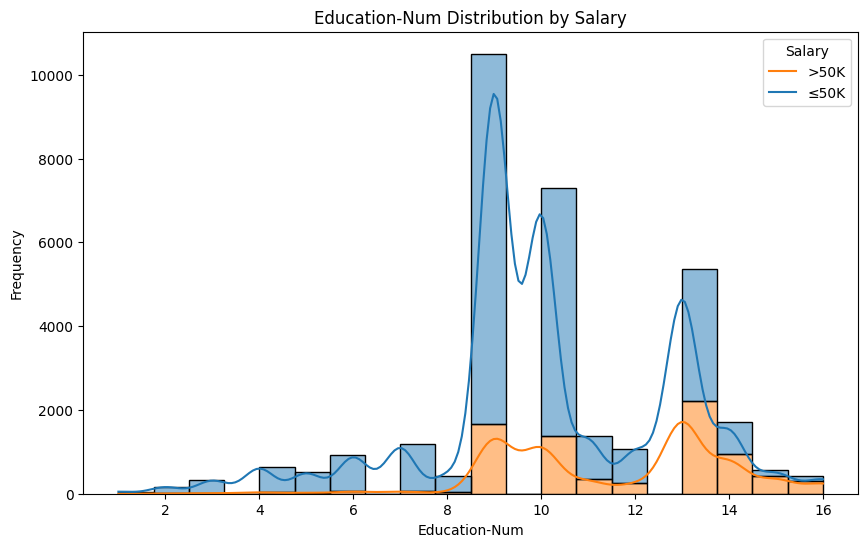

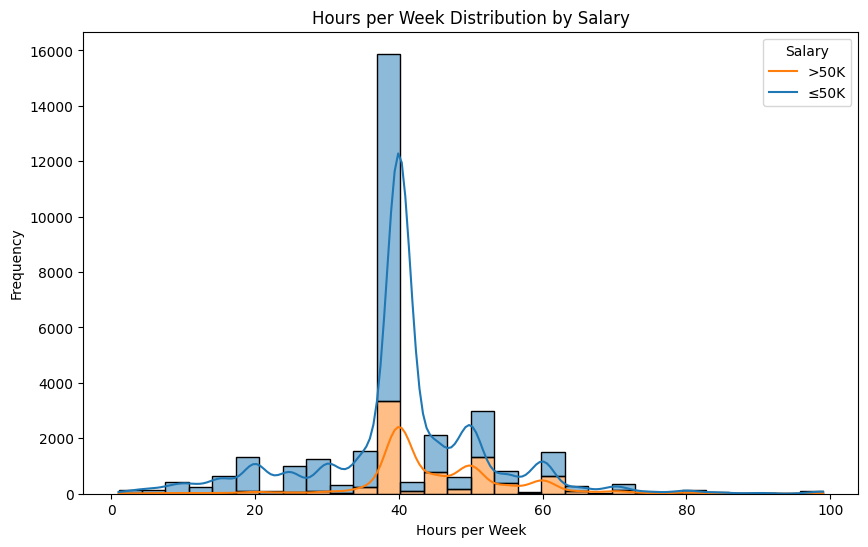

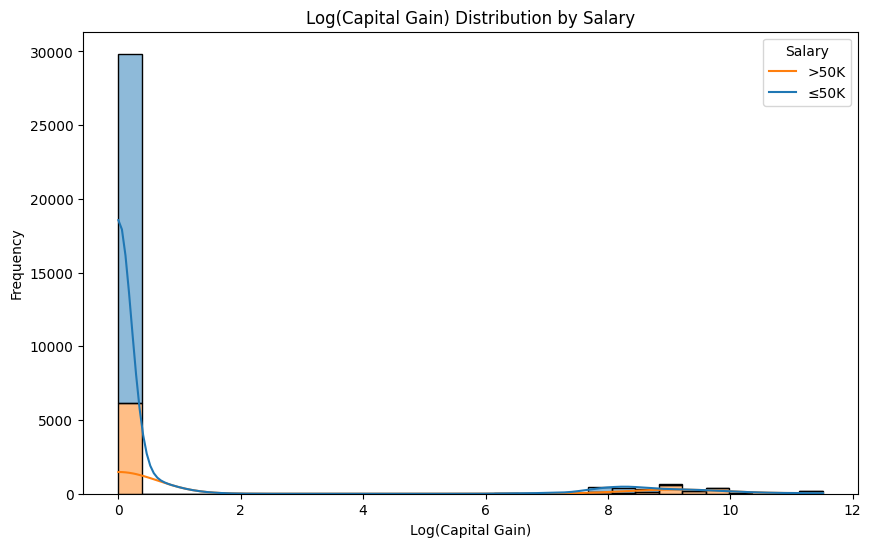

In [413]:
# 2. Histograms for Numerical Features by Salary
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='salary', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution by Salary')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Salary', labels=['>50K', '≤50K'])
plt.show()
print(" \n ")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='education-num', hue='salary', multiple='stack', bins=20, kde=True)
plt.title('Education-Num Distribution by Salary')
plt.xlabel('Education-Num')
plt.ylabel('Frequency')
plt.legend(title='Salary', labels=['>50K', '≤50K'])
plt.show()
print(" \n ")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='hours-per-week', hue='salary', multiple='stack', bins=30, kde=True)
plt.title('Hours per Week Distribution by Salary')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.legend(title='Salary', labels=['>50K', '≤50K'])
plt.show()
print(" \n ")
# Log-transform capital-gain for better visualization (handles sparsity)
df['log_capital_gain'] = df['capital-gain'].apply(lambda x: np.log1p(x))  # log(1+x) for zeros
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='log_capital_gain', hue='salary', multiple='stack', bins=30, kde=True)
plt.title('Log(Capital Gain) Distribution by Salary')
plt.xlabel('Log(Capital Gain)')
plt.ylabel('Frequency')
plt.legend(title='Salary', labels=['>50K', '≤50K'])
plt.show()
print(" \n ")

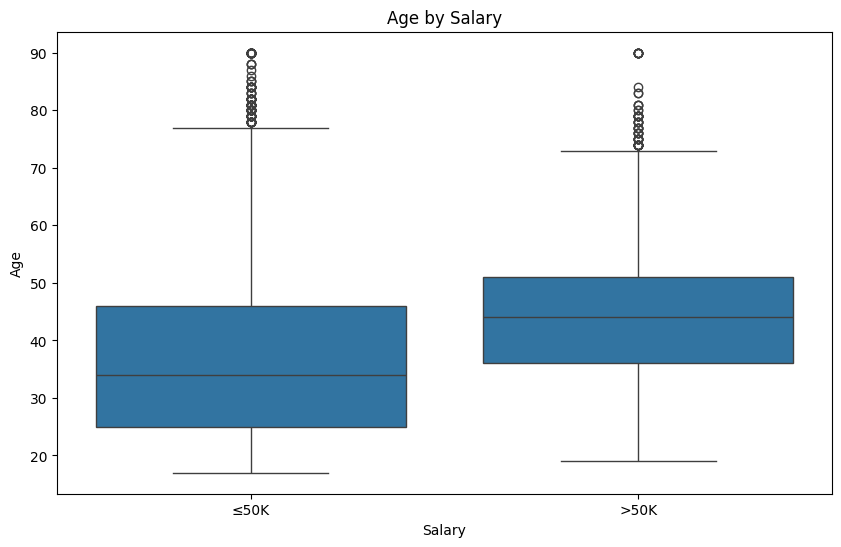

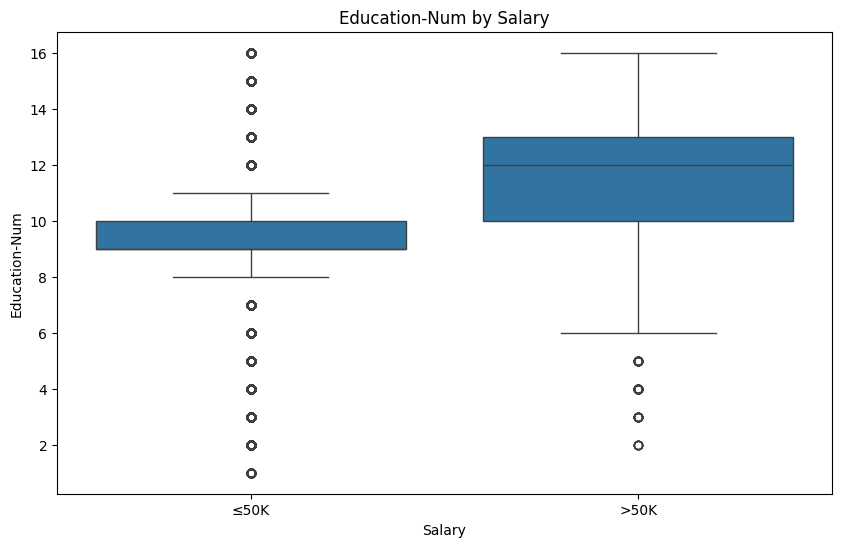

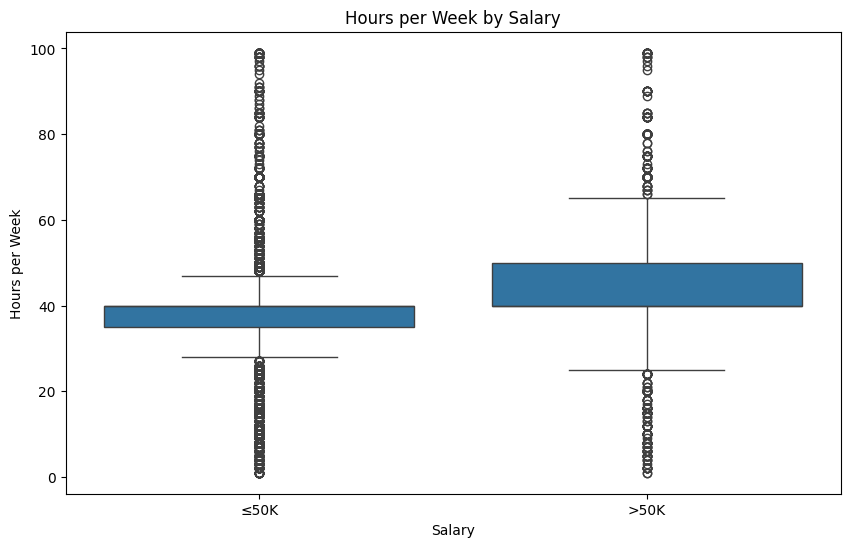

In [414]:
# 3. Box Plots for Numerical Features vs. Salary
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='salary', y='age')
plt.title('Age by Salary')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['≤50K', '>50K'])
plt.show()
print("\n")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='salary', y='education-num')
plt.title('Education-Num by Salary')
plt.xlabel('Salary')
plt.ylabel('Education-Num')
plt.xticks(ticks=[0, 1], labels=['≤50K', '>50K'])
plt.show()
print("\n")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='salary', y='hours-per-week')
plt.title('Hours per Week by Salary')
plt.xlabel('Salary')
plt.ylabel('Hours per Week')
plt.xticks(ticks=[0, 1], labels=['≤50K', '>50K'])
plt.show()
print("\n")

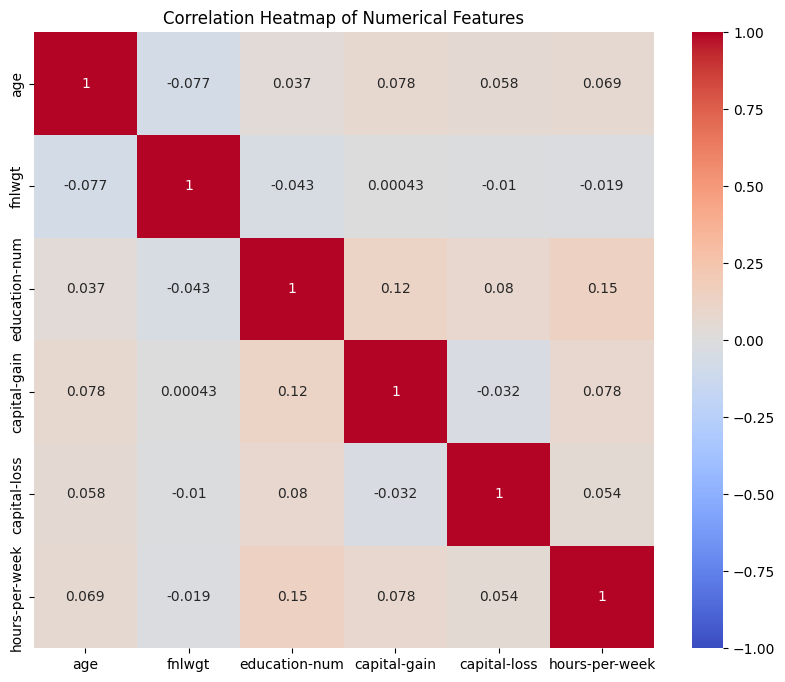

In [415]:
# 4. Correlation Heatmap for Numerical Features
numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 4. Model Development

## 4.1 Split the Dataset into Training and Test Sets

In [416]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('salary', axis=1)  # Assuming '>50K' is encoded as such
y = df['salary']

#y = f(x) - independent variable(features)
#y - dependent variable (target variable)

In [417]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [418]:
X_train.shape

(26048, 15)

In [337]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,log_capital_gain
5514,33,1,198183,7,13,0,4,2,1,1,0,0,50,0,0.0
19777,36,0,86459,10,11,1,7,1,1,0,0,1887,50,0,0.0
10781,58,2,203039,11,5,4,5,2,1,0,0,0,40,0,0.0
32240,21,0,180190,10,11,1,1,1,1,0,0,0,46,0,0.0
9876,27,0,279872,3,10,3,3,2,1,0,0,0,40,0,0.0


In [419]:
X_test.shape

(6513, 15)

## RandomForest

Random Forest Train Score: 0.9999
Random Forest Test Score: 0.8630
Random Forest Accuracy: 0.8630431444802702
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.76      0.64      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513



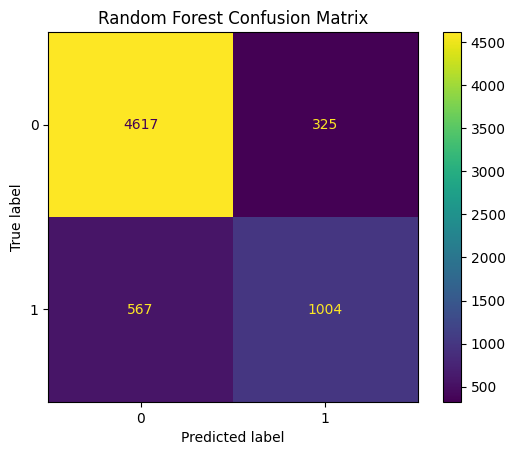

In [420]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Scores
print(f"Random Forest Train Score: {random_forest.score(X_train, y_train):.4f}")
print(f"Random Forest Test Score: {random_forest.score(X_test, y_test):.4f}")

# Predict and evaluate
y_pred_random_forest = random_forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_random_forest))

# Confusion matrix
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_random_forest)
disp.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()


## Gradient Boosting (XGBoost)

XGBoost Train Score: 0.9066
XGBoost Test Score: 0.8724
XGBoost Accuracy: 0.8724090280976509
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4942
           1       0.77      0.67      0.72      1571

    accuracy                           0.87      6513
   macro avg       0.83      0.80      0.82      6513
weighted avg       0.87      0.87      0.87      6513



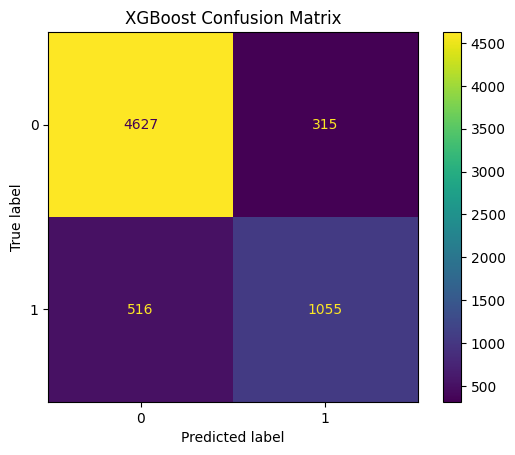

In [421]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Scores
print(f"XGBoost Train Score: {xgb.score(X_train, y_train):.4f}")
print(f"XGBoost Test Score: {xgb.score(X_test, y_test):.4f}")

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp.plot()
plt.title('XGBoost Confusion Matrix')
plt.show()


SVM Train Score: 0.7951
SVM Test Score: 0.7958
SVM Accuracy: 0.7957930293259634
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      4942
           1       0.98      0.16      0.27      1571

    accuracy                           0.80      6513
   macro avg       0.89      0.58      0.58      6513
weighted avg       0.84      0.80      0.73      6513



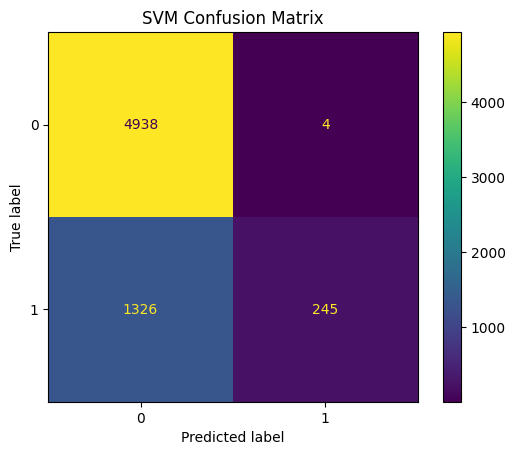

In [422]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Scores
print(f"SVM Train Score: {svm.score(X_train, y_train):.4f}")
print(f"SVM Test Score: {svm.score(X_test, y_test):.4f}")

# Predict and evaluate
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.title('SVM Confusion Matrix')
plt.show()
